In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from optics import OPTICS

In [2]:
COLORS = ['gold', 'darkorange', 'lightcoral',
          'seagreen', 'darkcyan', 'steelblue', 'slateblue']

                x           y    category
count  312.000000  312.000000  312.000000
mean    18.408173   16.344712    2.016026
std      7.299923    6.867232    0.815682
min      3.000000    2.900000    1.000000
25%     12.912500   11.337500    1.000000
50%     18.325000   16.050000    2.000000
75%     23.400000   21.362500    3.000000
max     31.950000   31.650000    3.000000
darkorange points: 101
lightcoral points: 105
seagreen points: 106


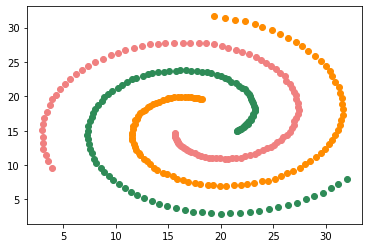

In [3]:
df = pd.read_table("cluster_data_set/spiral.txt", delim_whitespace=True)
print(df.describe())
print("{:s} points: {:d}".format(COLORS[1],list(df.iloc[:,2]).count(1)))
print("{:s} points: {:d}".format(COLORS[2],list(df.iloc[:,2]).count(2)))
print("{:s} points: {:d}".format(COLORS[3],list(df.iloc[:,2]).count(3)))
fig0 = plt.figure("ground truth")
for i in range(len(df)):
    plt.scatter(df.iloc[i, 0], df.iloc[i, 1], color=COLORS[df.iloc[i, 2] % len(COLORS)])

In [4]:
df1 = df.iloc[:, :2]
model = OPTICS(df1)
model.optics(Eps=10000, MinPts=1)

(0.0, 2.5)

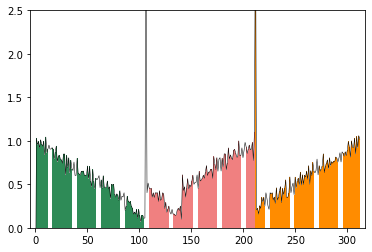

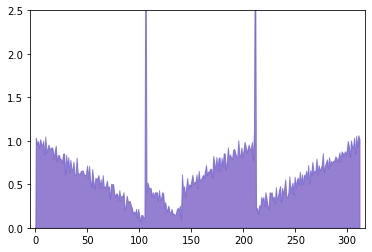

In [5]:
fig1 = plt.figure("ordered rd with ground truth label")
index = np.linspace(0, model.len, model.len)
rd = []
cd = []
labels = []
for i in range(model.len):
    rd.append(model.reachable_distances[model.result_queue[i]])
    cd.append(model.core_distances[model.result_queue[i]])
    labels.append(COLORS[df.iloc[model.result_queue[i], 2] % len(COLORS)])
plt.bar(index, rd, color=labels)
plt.plot(index,rd,color='black',linewidth=0.5)
plt.ylim(0, 2.5)
plt.xlim(-5, model.len+5)
fig2 = plt.figure("ordered rd and cd")
plt.fill_between(index, 0, cd, alpha=0.3, color='lightcoral')
plt.fill_between(index, 0, rd, alpha=0.7, color='slateblue')
plt.xlim(-5, model.len+5)
plt.ylim(0, 2.5)

darkorange points: 106
lightcoral points: 105
seagreen points: 101
noise points: 0


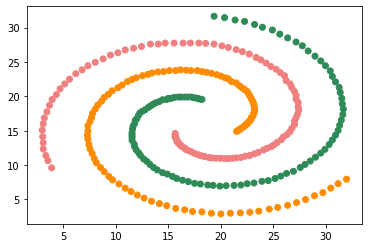

<Figure size 432x288 with 0 Axes>

In [6]:
model.cluster_extract(1.2)
fig3 = plt.figure("clustering result")
cluster_labels = []
for i in range(model.len):
    c = model.cluster_labels[i]
    if c==-1:
        cluster_labels.append("black")
    else:
        cluster_labels.append(COLORS[c % len(COLORS)])
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color=cluster_labels)
print("{:s} points: {:d}".format(COLORS[1],list(model.cluster_labels).count(1)))
print("{:s} points: {:d}".format(COLORS[2],list(model.cluster_labels).count(2)))
print("{:s} points: {:d}".format(COLORS[3],list(model.cluster_labels).count(3)))
print("noise points: {:d}".format(list(model.cluster_labels).count(-1)))
fig4 = plt.figure("rd with clustering labels")